<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1
Write a function to perform lincon(h; x) to convolve two input sequences using the expression for liner convolution

In [31]:
# handmade method to convolve two sequences
def lincon(x,h):
  len_x = len(x)
  len_h = len(h)

  if len_x < len_h:
    x , h = h , x
    len_x, len_h = len_h, len_x 

  x_ = np.pad(np.asarray(x), (len_h-1,len_h-1))
  l = len_h + len_x - 1
  h_ = np.asarray(h[::-1])
  y = []
  for i in range(l):
    assert len(x_[i:i+len_h]) == len(h_) , print(f"x: {len(x_[i:i+len_h])} || h: {len(h_)}")
    y.append(np.sum(np.dot(h_,x_[i:i+len_h])))

  return np.asarray(y)

In [32]:
h = np.pad(np.ones(10),(10,10))
x = np.pad(np.ones(10),(10,10))

print(np.convolve(x,h))
print(lincon(x,h))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


## Question 2

Write another function freqconv(h; x) to perform the linear convolution of convolve h and x using
their ffts.

In [36]:
def freqconv(h,x):

  x = np.asarray(x)
  h = np.asarray(h)
  n = len(x) + len(h) -1

  X = np.fft.fft(x,n)
  H = np.fft.fft(h,n)

  y = abs(np.fft.ifft(X*H))
  return np.asarray(y)

In [42]:
print(np.convolve(h,x))
print(freqconv(h,x))
print((np.convolve(h,x) - freqconv(h,x)).sum())

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
[2.03180222e-15 2.05754375e-15 2.53135113e-15 2.05371413e-15
 1.64295954e-15 1.52697564e-15 1.10698144e-15 2.36877961e-16
 3.77228851e-16 2.63200184e-16 5.69496486e-16 6.77313961e-16
 1.39231405e-15 1.13974273e-15 1.35932491e-15 8.71654444e-16
 1.45971835e-15 1.00600731e-15 8.68008584e-16 1.20669864e-15
 1.00000000e+00 2.00000000e+00 3.00000000e+00 4.00000000e+00
 5.00000000e+00 6.00000000e+00 7.00000000e+00 8.00000000e+00
 9.00000000e+00 1.00000000e+01 9.00000000e+00 8.00000000e+00
 7.00000000e+00 6.00000000e+00 5.00000000e+00 4.00000000e+00
 3.00000000e+00 2.00000000e+00 1.00000000e+00 6.02154861e-16
 8.53873528e-16 5.09538268e-16 8.26301715e-16 1.28471709e-15
 7.29113098e-16 1.28405555e-15 8.53248733e-16 8.68251151e-16
 3.31545349e-16 3.99669998e

## Question 3
Write a function to generate 1000 samples of a periodic train of pulses, with a period T, specified by the user.

In [74]:
def pulse_train(T):
  assert T >= 1, "period should be greater than 1"
  pulse = np.pad(np.ones(T),(T,0))
  pulse_t = []
  for i in range(1000):
    pulse_t = np.concatenate((pulse_t,pulse))
  return pulse_t

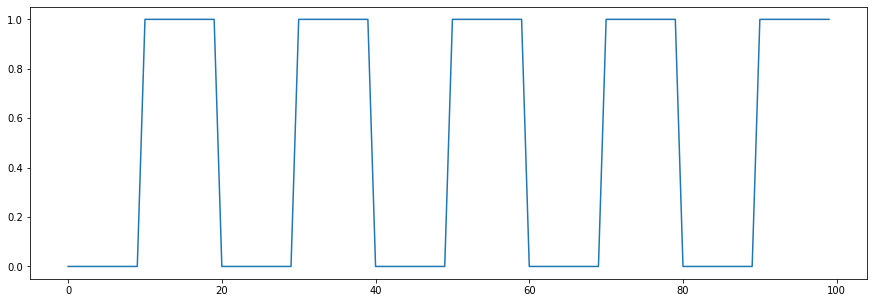

In [75]:
a = pulse_train(10)

plt.figure(figsize=(15,5))
plt.plot(a[:100])

## Question 4
Define a vector h = [1; 2; 3; 4] and convolve it with the a pulse train with periods T=1,2,3 and 4, what do you observe?

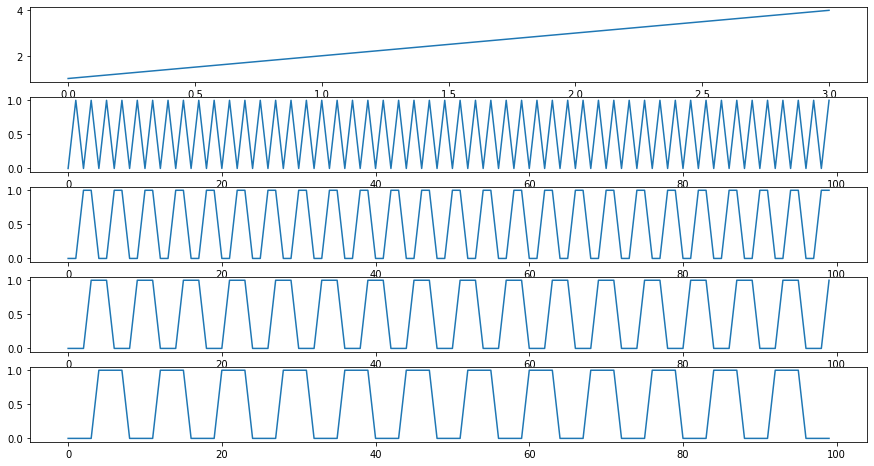

In [80]:
h = [1,2,3,4]

t_1 = pulse_train(1)
t_2 = pulse_train(2)
t_3 = pulse_train(3)
t_4 = pulse_train(4)

plt.figure(figsize=(15,8))
plt.subplot(511)
plt.plot(h)

plt.subplot(512)
plt.plot(t_1[:100])

plt.subplot(513)
plt.plot(t_2[:100])

plt.subplot(514)
plt.plot(t_3[:100])

plt.subplot(515)
plt.plot(t_4[:100])

plt.show()

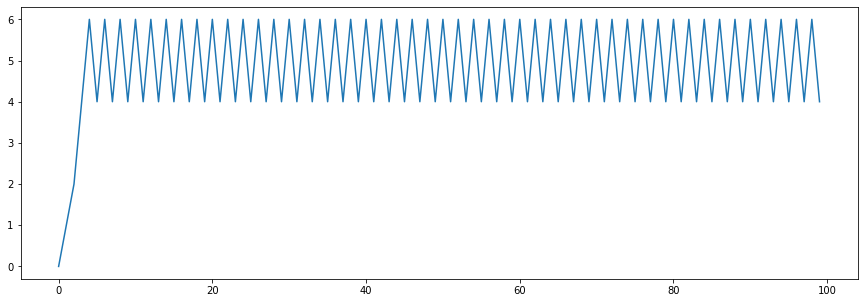

In [88]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_1)[:100])
plt.show()

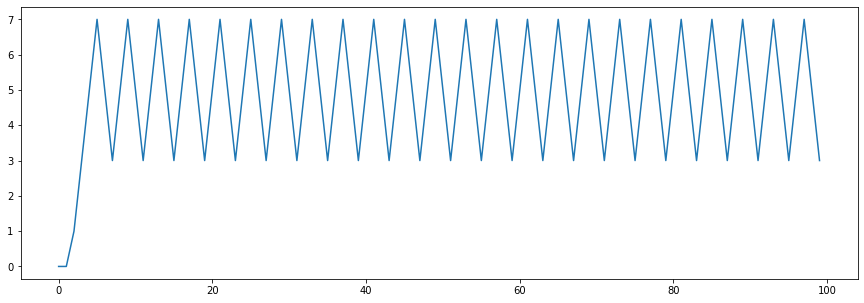

In [89]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_2)[:100])
plt.show()

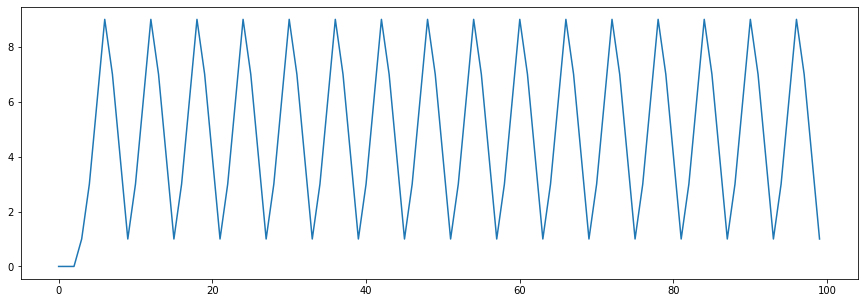

In [90]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_3)[:100])
plt.show()

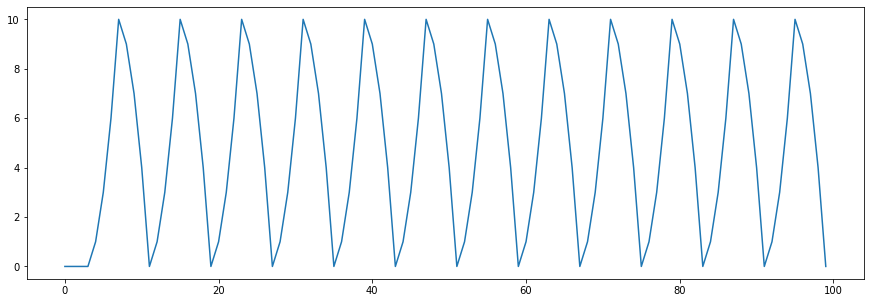

In [91]:
plt.figure(figsize=(15,5))
plt.plot(freqconv(h,t_4)[:100])
plt.show()

## Question 5

Sample your voice at 8kHz for 2 seconds and pass it through an arbitrary, length 16 FIR filter using
1. Direct Linear convolution
2. Linear Convolution using FFT
3. The overlap-add method for block lengths: 64, 128, 256 and 512
4. The overlap save method for block length: 64, 128, 256, and 512

In each of the above cases, obtain the total number of required real multiplications, and using that as an indication of computational complexity, comment on the optimal block size for overlap add and overlap save implementation of linear convolution.

In [92]:
# Do something something

## Question 6
Write a function myquant(x,L) to quantize the input vector into L uniformly spaced intervals.

In [135]:
x = np.random.rand(100)*100

In [161]:
def myquant(x,L, mode= 'avg'):
  x =  np.asarray(x, dtype=np.float32)
  min_x = min(x)
  max_x = max(x)
  
  lvls = np.linspace(min_x,max_x,num=L)
  y = []

  for val in x:
    i = np.argmax(val <= lvls)
    
    if mode == 'avg': 
      y.append(((lvls[i]+lvls[i-1])/2) if i>0 else min_x)
    elif mode == 'min':
      y.append(lvls[i-1] if i>0 else min_x)

  return {"levels":lvls, "output":y}

In [162]:
out = myquant(x,10, mode='avg')

In [163]:
print(out['levels'])

[ 0.86053872 11.86082056 22.8611024  33.86138423 44.86166607 55.86194791
 66.86222974 77.86251158 88.86279342 99.86307526]


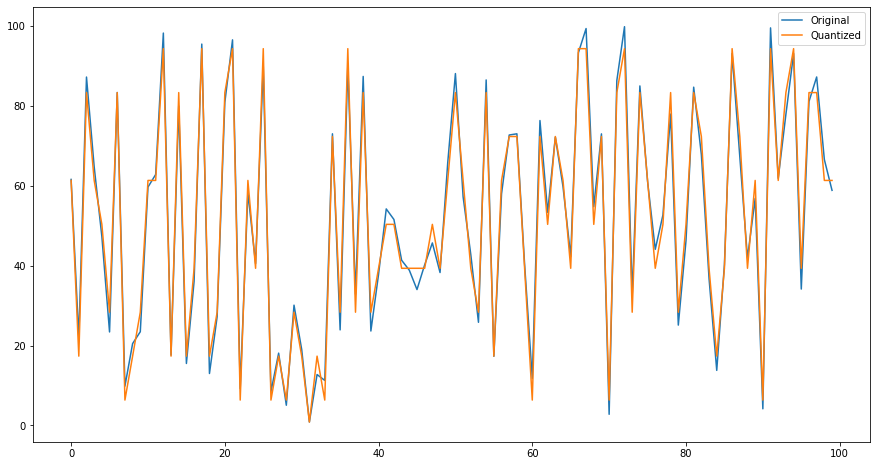

In [164]:
plt.figure(figsize=(15,8))
plt.plot(x, label='Original')
plt.plot(out['output'], label='Quantized')
plt.legend()
plt.show()

In [165]:
print(max(x-out['output']))

5.500141598289588


## Question 7
Use the mean squared error function defined in the previous lab sheet to plot the quantization mean squared error as a function of L. Write down your observations.

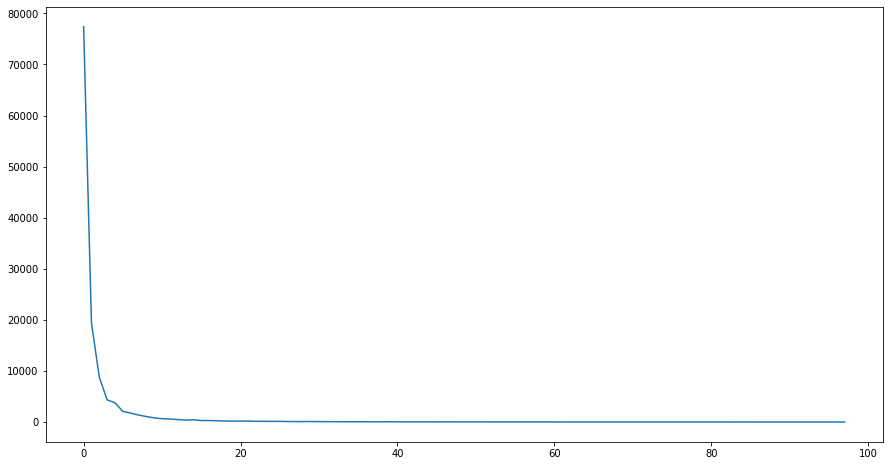

In [172]:
mse_list = []
for l in range(2,len(x)):
  out = myquant(x, l)
  error = x-out["output"]
  mse = np.mean(np.sum([ i**2 for i in error ]))
  mse_list.append(mse)


plt.figure(figsize=(15,8))
plt.plot(mse_list)
plt.show()

## Question 8
Take a five second audio sample of your choice and pass it through the quantizer designed in
Question 6. Observe the effect of mean squared quantization error on the perceptual quality of the
audio sample.

In [173]:
# Do something something

## Question 9
Modify the function myquant(x,L) to lev quant(x,v) that takes another vector v as an input and quantizes the points in x around the points in v according to the nearest neighbors approach.

In [180]:
def lev_quant(x,v):
  y = []
  v = np.sort(np.asarray(v))
  for xi in x:
    i = np.argmax(v >= xi)
    upper_err = v[i]-xi if v[i]>xi else 0
    lower_err = xi - v[i-1] if i>0 else 0 
    upper = v[i] if v[i]>xi else v[-1]
    lower = v[i-1] if i>0 else v[0]

    if upper_err > lower_err:
      y.append(lower)
    else:
      y.append(upper)

  return np.asarray(y)

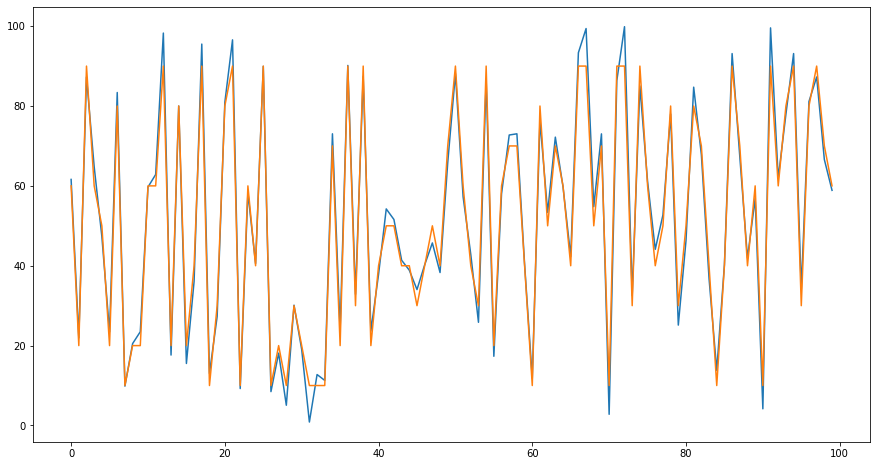

In [183]:
v_example = [10,20,30,40,50,60,70,80,90]
y = lev_quant(x,v_example)

plt.figure(figsize=(15,8))
plt.plot(x,label="Original")
plt.plot(y,label="Quantized")
plt.show()

## Question 10
Extend lev quant(x,v) to handle complex numbers. Write down the changes that you needed to consider in the notebook.

In [184]:
def lev_quant_complex(x,v):
  y = []
  v = np.sort_complex(np.asarray(v))      # function changed to sort complex values
  for xi_ in x:
    xi = abs(xi_)                        # Taking absolute value of x
    i = np.argmax(v >= xi)
    upper_err = abs(v[i])-xi if abs(v[i])>xi else 0  #comparing absolute values
    lower_err = xi - abs(v[i-1]) if i>0 else 0       #comparing absolute values
    upper = v[i] if abs(v[i])>xi else v[-1]          #comparing absolute values
    lower = v[i-1] if i>0 else v[0]

    if upper_err > lower_err:
      y.append(lower)
    else:
      y.append(upper)

  return np.asarray(y)

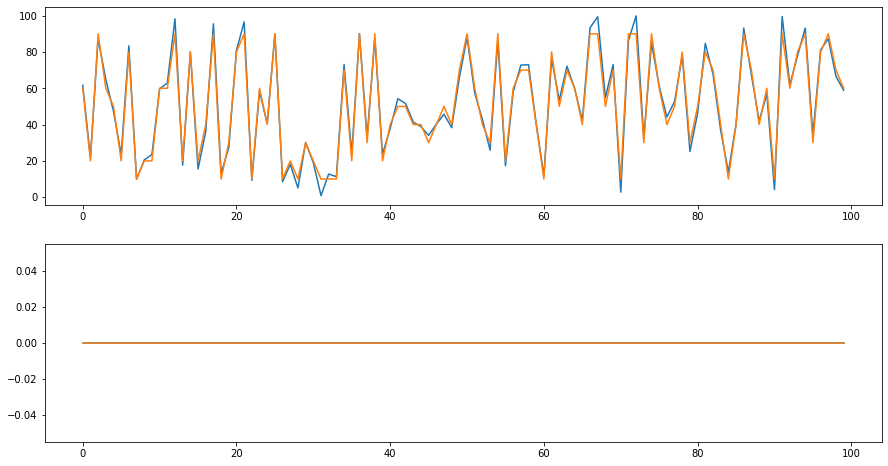

In [186]:
v_example = [10,20,30,40,50,60,70,80,90]
y = lev_quant_complex(x,v_example)

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(np.real(x),label="Original Real")
plt.plot(np.real(y),label="Quantized Real")
plt.subplot(212)
plt.plot(np.imag(x),label="Original Real")
plt.plot(np.imag(y),label="Quantized Real")
plt.show()

## Question 11
Use the function myquant(x,L) to plot the histogram of the input vector using only the for loop and the if statement.

(array([ 9., 10., 10., 16.,  8., 14.,  8., 14., 11.]),
 array([ 0.86053872, 11.86082056, 22.8611024 , 33.86138423, 44.86166607,
        55.86194791, 66.86222974, 77.86251158, 88.86279342, 99.86307526]),
 <a list of 9 Patch objects>)

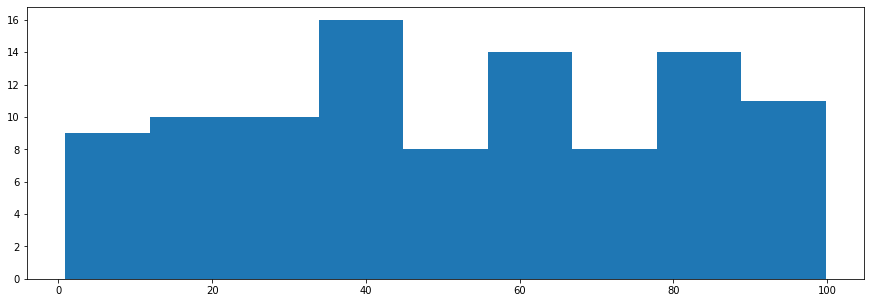

In [192]:
out = myquant(x, 10, mode='avg')

plt.figure(figsize=(15,5))
plt.hist(out['output'], bins=out['levels'])

## Question 12
Implement the K-means vector quantization algorithm for an arbitrary set of input vectors.


In [ ]:
# do something something